# Merger Rate in a Primordial Black Hole Cluster

#### Code Writed by Tadeo D.

**References:** [arXiv:2105.14523](https://arxiv.org/pdf/2105.14523.pdf). [arXiv:1603.05234](https://arxiv.org/pdf/1603.05234.pdf)

In [190]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Constantes físicas en el SI
G_SI = 6.67430e-11  # m^3 kg^-1 s^-2
c_SI = 3.0e8  # m/s

# Parámetros del problema en el SI
M_DM_kg = 1e7 * 1.989e30  # 1e7 M_sun en kg
M_PBH_kg = 10 * 1.989e30  # 10 M_sun en kg
N_PBH = M_DM_kg / (2 * M_PBH_kg)  # Número total de PBHs
R_c_m = 1.0 * 3.086e16  # 1 pc en metros

# Potencial gravitacional en el SI
def phi_SI(r):
    return (G_SI * M_DM_kg / R_c_m) * (1 + (r**2 / R_c_m**2))**(-1/2)

# Densidad de masa de PBHs en el SI
def rho_pbh_SI(r):
    return ((3 * N_PBH * M_PBH_kg) / (4 * np.pi * R_c_m**3)) * (1 + (r**2 / R_c_m**2))**(-5/2)

# Densidad numérica de PBHs en el SI
def n_pbh_SI(r):
    return rho_pbh_SI(r) / M_PBH_kg

# Función de distribución de energía en el SI
def f_E_SI(E):
    return (24 * np.sqrt(2) * N_PBH * R_c_m**2 * E**(7/2)) / (7 * np.pi**3 * G_SI**5 * M_DM_kg**5)

# Integrando para la velocidad media cuadrática en el SI
def integrand_SI(E, r):
    return f_E_SI(E) * (2 * (phi_SI(r) - E))**(3/2)

# Velocidad media cuadrática en el SI
def mean_square_velocity_SI(r):
    n_r = n_pbh_SI(r)
    if n_r == 0:
        return 0
    integral, _ = spi.quad(integrand_SI, 0, phi_SI(r), args=(r))
    return np.sqrt((4 * np.pi / n_r) * integral)

# Generar valores de radio en metros
r_j_values_m = np.linspace(0.1 * R_c_m, R_c_m, 10)

# Evaluar la velocidad media cuadrática en función del radio
v_mean_values_SI = np.array([mean_square_velocity_SI(r) for r in r_j_values_m])

# Evaluar la integral I(r_j)
def integrand_I(r_i, r_j):
    n_i = n_pbh_SI(r_i)
    v_i = mean_square_velocity_SI(r_i)
    v_j = mean_square_velocity_SI(r_j)
    if v_i == 0 or v_j == 0:
        return 0
    term = (v_j + v_i)**(3/7) - abs(v_j - v_i)**(3/7)
    return r_i**2 * (n_i / v_i) * term

def I_rj(r_j):
    integral, _ = spi.quad(integrand_I, 0.1 * R_c_m, R_c_m, args=(r_j))
    return integral

I_values = np.array([I_rj(r_j) for r_j in r_j_values_m])

# Ajustar un polinomio para obtener una aproximación funcional de I(r_j)
coeffs = np.polyfit(r_j_values_m, I_values, 3)

# Sección eficaz fija
sigma_fixed_SI = 6.195875308611968e+31  # en m^2

#1.6621648638490793e+29 

def Gamma_rj(r_j, sigma):
    n_j = n_pbh_SI(r_j)
    v_j = mean_square_velocity_SI(r_j)
    if v_j == 0 or n_j == 0:
        return 0
    I_rj_value = np.polyval(coeffs, r_j)
    return (14 * np.pi / 3) * (sigma * (n_j / v_j) * I_rj_value)

Gamma_values = np.array([Gamma_rj(r_j, sigma_fixed_SI) for r_j in r_j_values_m])

# Conversión de unidades
r_j_values_pc = r_j_values_m / 3.086e16  # Convertir metros a parsecs
Gamma_values_yr = Gamma_values * 3.154e7  # Convertir s^-1 a yr^-1
age_universe_yr = 13.8e9  # Edad del universo en años
mergers_total = Gamma_values_yr * age_universe_yr

time_first_merger_yr = 1 / Gamma_values_yr

time_first_merger_Gyr = time_first_merger_yr / 1e9  # Convertir a Giga años

# Imprimir los resultados en formato tabular
print(f"{'r_j (pc)':<12}{'Gamma (yr^-1)':<20}{'Total mergers in UT':<30}{'Time to 1st merger (Gyr)'}")
print("=" * 80)
for i in range(len(r_j_values_pc)):
    print(f"{r_j_values_pc[i]:<12.6}{Gamma_values_yr[i]:<20.6e}{mergers_total[i]:<30}{time_first_merger_Gyr[i]:.3e}")


r_j (pc)    Gamma (yr^-1)       Total mergers in UT           Time to 1st merger (Gyr)
0.1         1.307348e-08        180.41408041787764            7.649e-02
0.2         1.242753e-08        171.49984670147802            8.047e-02
0.3         1.140302e-08        157.36163094356215            8.770e-02
0.4         1.011542e-08        139.5928536840899             9.886e-02
0.5         8.699193e-09        120.04886827619917            1.150e-01
0.6         7.275486e-09        100.40170057083546            1.374e-01
0.7         5.933720e-09        81.88533488184353             1.685e-01
0.8         4.727637e-09        65.24138592724042             2.115e-01
0.9         3.680693e-09        50.793566127860025            2.717e-01
1.0         2.794955e-09        38.570383334728426            3.578e-01


In [238]:
delta_t = np.min(time_first_merger_yr)
#if delta_t > age_universe_yr:
#    delta_t = 1e9
print("Minimum time to get 1st Generation: \n T_merger = ","{:.2e}".format(delta_t),"yr\n")
Prob_BPBH_form = Gamma_values_yr * delta_t
#print(f"{'Probability':<12}")
#print("=" * 15)
#for i in range(len(Prob_BPBH_form)):
#    print(f"{Prob_BPBH_form[i]:<12.6}")
def N_PBH_region(r):
    integran = ((3 * N_PBH) / (4 * np.pi * R_c_m**3)) * (1 + (r**2 / R_c_m**2))**(-5/2)
    integral, _ = spi.quad(lambda r: integran * (4 * np.pi * r**2), 0, r)
    return integral

N_PBH_r = np.array([N_PBH_region(r_j) for r_j in r_j_values_m])

print(f"{'Gamma (yr^-1)':<15}{'N_pbh(r)':<12}{'Number of Collisions':<12}")
print("=" * 50)
for i in range(len(Prob_BPBH_form)):
    N_collisions = np.array(np.round(Prob_BPBH_form * N_PBH_r))
    print(f"{Gamma_values_yr[i]:<15.3e}{np.round(2*N_PBH_r[i]):<15.1f}{N_collisions[i]:<20.1f}")

Minimum time to get 1st Generation: 
 T_merger =  7.65e+07 yr

Gamma (yr^-1)  N_pbh(r)    Number of Collisions
1.307e-08      975.0          488.0               
1.243e-08      7253.0         3447.0              
1.140e-08      21767.0        9493.0              
1.012e-08      44161.0        17084.0             
8.699e-09      71554.0        23806.0             
7.275e-09      100140.0       27864.0             
5.934e-09      126569.0       28723.0             
4.728e-09      148648.0       26877.0             
3.681e-09      165398.0       23283.0             
2.795e-09      176777.0       18896.0             


E_rad (J): 2.237616175020591e+47
Final Mass (M_sun): 18.75000492988068
6.427104939511643e+51
1.0919566934100484e+50


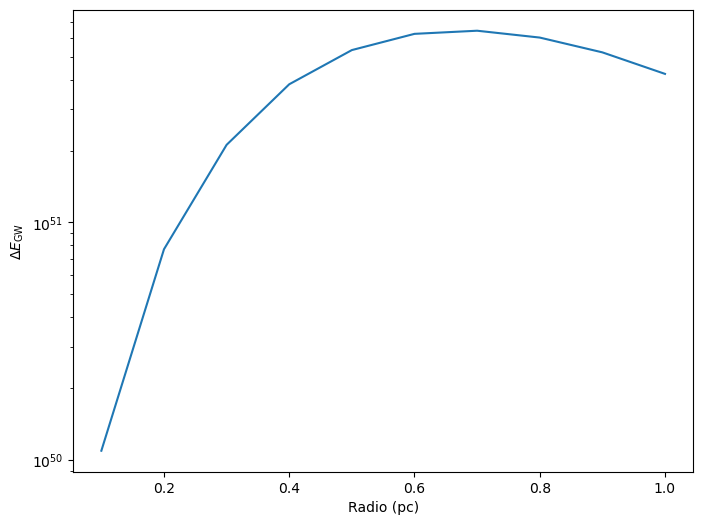

In [240]:
# Parámetros de entrada
a1_AU = 0.1 * 1.496e11  # 0.1 AU en metros

def E_rad_GW(m1, m2, a0, a1):
    """ Calcula la energía total radiada en ondas gravitacionales desde a0 hasta a1 """
    integral, _ = spi.quad(lambda a: (m1 * m2 * G_SI / (2 * a**2)), a0, a1)
    return integral

def R_Swarzschild(M):
    return (2*G_SI*M)/(c_SI**2)

def final_mass_GW(m1, m2, a0, a1):
    """ Calcula la masa final del agujero negro fusionado después de la emisión de GW """
    E_rad = E_rad_GW(m1, m2, a0, a1)  # Energía radiada en GW
    return (m1 + m2) - (E_rad / c_SI**2)  # Corrección de masa

a0 = R_Swarzschild(M_PBH_kg) + R_Swarzschild(M_PBH_kg) # Separación inicial mínima antes de la fusión

# Calculamos la energía radiada y la nueva masa fusionada en cada cascarón
final_masses = final_mass_GW(M_PBH_kg, M_PBH_kg, a0, a1_AU)
energy_radiated = E_rad_GW(M_PBH_kg, M_PBH_kg, a0, a1_AU)

print("E_rad (J):", energy_radiated)
print("Final Mass (M_sun):", final_masses/1.989e30)

energy_total_GW_shell = N_collisions * energy_radiated  # Usamos la misma E_rad en cada colisión

print(np.max(energy_total_GW_shell))
print(np.min(energy_total_GW_shell))


plt.figure(figsize=(8, 6))
plt.plot(r_j_values_pc, energy_total_GW_shell)
plt.xlabel("Radio (pc)")
plt.ylabel(r'$\Delta E_{\rm GW}$')
plt.yscale('log')